In [4]:
# Importing required packages and libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso


In [5]:
# Creating a class which contians answers as wrapper functions

class Assignment1:
    def __init__(self, data):
        self.df = data

    def get_data(self):
        print(self.df.head())
    
    def rmsle(self,y_true,y_pred):
        return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))

    def answer_1(self):
        print(f'Shape :{self.df.shape}')
        # feature type and features
        print(f'Features :{self.df.columns}')
        print(f'Feature type : {self.df.dtypes}')
        # missing values
        print(f'Feature Info : {self.df.info()}')
        print(f'Null values sum check in data set: {self.df.isnull().sum()}')
    
    def answer_2(self):
        # Histogram for visualizing target variable distribution
        plt.figure(figsize=(10,8))
        plt.hist(self.df['count'],bins=20)
        plt.xlabel("hourly bike rentals")
        plt.ylabel("Frequency")
        plt.title("Distribution of Hourly Bike Rentals")
        plt.show

        # Visualizing numerical features
        numeric_features = ['temp', 'atemp', 'humidity', 'windspeed']  
       
        for col in numeric_features:
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=self.df[col], y=self.df['count'])
            plt.title(f"{col} vs count")
            plt.show()
        
        # Visualization for categorical columns using box plot
        categorical_columns = ['season','holiday','workingday',
                            'weather']
        for col in categorical_columns:
            plt.figure(figsize=(6,4))
            sns.boxplot(x = self.df[col], y = self.df['count'])
            plt.show()

    def answer_3(self):
        df = self.df
        # We are dropping registered and casual as their sum gives us the count(target)
        df = df.drop(columns=['datetime','registered','casual'])
        df = pd.get_dummies(df, columns=['weather','season'], drop_first=True)

        X = df.drop(columns=['count'])
        y = df['count']

        mi = mutual_info_regression(X, y)
        mi_series = pd.Series(mi, index=X.columns)

        print(mi_series.sort_values(ascending=False))
        return X

    def answer_4(self):
        # 1. LOAD DATA
        df = self.df

        # 2. FEATURE ENGINEERING
        # Convert datetime column
        df['datetime'] = pd.to_datetime(df['datetime'])
        # Extract useful time features
        df['hour'] = df['datetime'].dt.hour
        df['weekday'] = df['datetime'].dt.weekday
        df['month'] = df['datetime'].dt.month
        df['year'] = df['datetime'].dt.year
        df['season'] = df['season']  # already present in dataset

        # Drop datetime column after extraction
        # We are removing datetime as MI allows numeric and registered and casual as count = registered + casual
        df = df.drop(columns=['datetime','casual','registered'])

        # 3. DEFINE TARGET & FEATURES
        y = df['count']
        X = df.drop(columns=['count'])

        # Identify categorical columns (non-binary)
        categorical_cols = ['season', 'weather', 'month', 'weekday', 'hour', 'year']

        # 4. ONE-HOT ENCODING
        ct = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(drop='first'), categorical_cols)
            ],
            remainder='passthrough'
        )

        # Fit transform the data
        X_encoded = ct.fit_transform(X)

        # Get names after one-hot encoding
        ohe = ct.named_transformers_['cat']
        ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

        # Numeric columns that were passed through
        num_cols = [col for col in X.columns if col not in categorical_cols]
        feature_names = list(ohe_feature_names) + num_cols

        # Convert to DataFrame
        X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=feature_names)

        # 5. MUTUAL INFORMATION SCORES
        mi = mutual_info_regression(X_encoded_df, y)
        mi_series = pd.Series(mi, index=feature_names).sort_values(ascending=False)

        print("===== MUTUAL INFORMATION SCORES =====")
        print(mi_series)
        return X_encoded_df
   
    def predict_model_date_untransformed_df(self,df,y):
        X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Building a linear regression model

        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predicting on validation dataset
        y_pred = model.predict(X_val)
        # print("prediction",y_pred)

        # Evaluating metrics
        # Mean square error
        # Root mean square error
        # RMSLE
        # R^2 
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_val, y_pred)


        rmsl_error = self.rmsle(y_val,y_pred)

        print("Linear Regression Performance w/o date transformations and feature enginnering")
        print("--------------------------------------------------------------------------------")
        print("RMSE:", rmse)
        print("RMSLE:",rmsl_error)
        print("R² Score:", r2)

    def predict_model_date_transformed_df(self,df,y):
        X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Building a linear regression model

        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predicting on validation dataset
        y_pred = model.predict(X_val)
        # print("prediction",y_pred)

        # Evaluating metrics
        # Mean square error
        # Root mean square error
        # RMSLE
        # R^2 
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_val, y_pred)


        rmsl_error = self.rmsle(y_val,y_pred)

        print("Linear Regression Performance with date transformations and feature enginnering")
        print("--------------------------------------------------------------------------------")
        print("RMSE:", rmse)
        print("RMSLE:",rmsl_error)
        print("R² Score:", r2)


    def answer_5_a(self,date_untransformed_df=None,date_transformed_df=None):
        # print(date_transformed_df.info(),date_untransformed_df.info())
        # We have already dropped the count column from tarining dataset which is the target variable
        # X_train is for traning the model and X_val is for validating the model
        # Splitting the dataset into traning data and validating the data
        y = self.df['count']
        self.predict_model_date_untransformed_df(date_untransformed_df,y)
        self.predict_model_date_transformed_df(date_transformed_df,y)

    def answer_6_2(self,df):
        poly = PolynomialFeatures(degree=2, include_bias=False)
        # poly = PolynomialFeatures(degree=3, include_bias=False)
        y = self.df['count']
        X_poly = poly.fit_transform(df)
        X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Train model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_val)

        # Evaluating metrics
        # Mean square error
        # Root mean square error
        # RMSLE
        # R^2 
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_val, y_pred)


        rmsl_error = self.rmsle(y_val,y_pred)

        print("Polynomial Regression of degree 2 Performance with date transformations")
        print("--------------------------------------------------------------------------------")
        print("RMSE:", rmse)
        print("RMSLE:",rmsl_error)
        print("R² Score:", r2)
        return X_train,X_val,y_train,y_val


    def answer_6_3(self,df):
        # poly = PolynomialFeatures(degree=2, include_bias=False)
        poly = PolynomialFeatures(degree=3, include_bias=False)
        y = self.df['count']
        X_poly = poly.fit_transform(df)
        X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Train model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_val)

        # Evaluating metrics
        # Mean square error
        # Root mean square error
        # RMSLE
        # R^2 
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_val, y_pred)


        rmsl_error = self.rmsle(y_val,y_pred)

        print("Polynomial Regression of degree 3 Performance with date transformations")
        print("--------------------------------------------------------------------------------")
        print("RMSE:", rmse)
        print("RMSLE:",rmsl_error)
        print("R² Score:", r2)

    def answer_6_2_ridge(self,df):
        alphas = [0.01, 0.1, 0.2, 0.3, 0.5,0.6,
         0.7,0.8,0.9,1,1.5,2,10]
        
        X_train,X_val,y_train,y_val = self.answer_6_2(df)


        print("Ridge Regression Results")
        print("-------------------------")

        for a in alphas:
            ridge = Ridge(alpha=a)
            ridge.fit(X_train, y_train)

            y_pred = ridge.predict(X_val)

            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            r2 = r2_score(y_val, y_pred)
            rmsl_error = self.rmsle(y_val,y_pred)

            print(f"alpha = {a}")
            print(f"  RMSE: {rmse:.4f}")
            print("RMSLE:",rmsl_error)
            print(f"  R²: {r2:.4f}")
            print()
        residual = y_pred - y_val
        return residual,y_pred


    def answer_6_2_lasso(self,df):
        alphas = [0.01, 0.1, 0.2, 0.3, 0.5,0.6,
         0.7,0.8,0.9,1,1.5,2,10]
        
        X_train,X_val,y_train,y_val = self.answer_6_2(df)


        print("Lasso Regression Results")
        print("-------------------------")

        for a in alphas:
            lasso = Lasso(alpha=a, max_iter=5000)
            lasso.fit(X_train, y_train)

            y_pred = lasso.predict(X_val)

            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            r2 = r2_score(y_val, y_pred)
            rmsl_error = self.rmsle(y_val,y_pred)

            print(f"alpha = {a}")
            print(f"  RMSE: {rmse:.4f}")
            print("RMSLE:",rmsl_error)
            print(f"  R²: {r2:.4f}")
            print()
        

    def answer_7(self):
        data = {
            "Model type": [
                "Linear Regression w/o date transformations",
                "Linear Regression with date transformations",
                "Polynomial Regression of degree n =2",
                "Polynomial Regression of degree n =3",
                "Ridge regression on polynomial of degree 2 and regularization param =10",
                "Lasso regression on polynomial of degree 2 and regularization param =10",
            ],
            "Root Mean square error (RMSE)": [
                155.74348578232826,
                100.7378963,
                53.56907405,
                150.5306186,
                53.5247,
                92.5239,
            ],
            "RMSLE": [
                1.329203183,
                0.845548863,
                0.622441027,
                1.328526235,
                0.585385424,
                0.99572647,
            ],
            "R^2 score": [
                0.26058794,
                0.690648302,
                0.912522769,
                0.309257082,
                0.9127,
                0.739,
            ],
            "Summary": [
                "The Error values are very high and the R^2 value is very low, which tells that the model is not able to predict the test results properly and there can be a scope for improvement by doing feature transformations",
                "The error values decreased 36% and the R^2 value improved by 165% which shows that by doing some feature transformations on the training data set the results of the model has improved",
                "The error values decreased by 26% and R^2 values has been improved by 31% when compared with above model, which shows that the features in the data set are non linear due to this the performance of the model has been improved",
                "The error values increased by 113% and R^2 values decreased by 190% compared to above model, which shows that the features in the data set are not following cubic polynomial, as R^2 value has been decreased drastically the model is not able to predict for the test data and it is overfitting",
                "The error values has decreased by 6% and the value of R^2 converges when compared with polynomial model of degree 2, after giving different values of ridge parameter and we stopped at alpha =10",
                "The value of the error increased by 60% and R^2 value decreased by 19% when compared with poly regression of degree 2, after giving different values of lasso parameter and we stopped at alpha =10 as the model is diverging; we will not recommend this implementation for this dataset",
            ],
            "Conclusions": [
                "",
                "We consider transformed training data for polynomial regression",
                "",
                "We consider polynomial regression of degree 2 for regularization",
                "Polynomial regression of degree 2 with ridge regression is the winning model for the features of the present dataset",
                "",
            ],
        }
        df = pd.DataFrame(data)
        df

    def answer_8(self,residuals,y_pred):
        print(residuals)
        # -----------------------------
        # 5. Residual Plot
        # -----------------------------
        plt.figure(figsize=(8,5))
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title("Residual Plot (Polynomial Degree 2)")
        plt.show()

        # -----------------------------
        # 6. Residuals Histogram
        # -----------------------------
        plt.figure(figsize=(8,5))
        plt.hist(residuals, bins=30)
        plt.title("Residuals Distribution")
        plt.xlabel("Residual")
        plt.ylabel("Frequency")
        plt.show()

      

In [7]:
data = pd.read_csv("bike_train.csv")
a = Assignment1(data)

data = pd.read_csv("bike_train.csv")
a = Assignment1(data)


In [9]:
# Q1:dataset size, missing values, and feature types.
# dataset size

a.answer_1()

Shape :(10450, 12)
Features :Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Feature type : datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10450 non-null  object 
 1   season      10450 non-null  int64  
 2   holiday     10450 non-null  int64  
 3   workingday  10450 non-null  int64  
 4   weather     10450 non-null  int64  
 5   temp        10450 non-null  float64
 6   atemp       10450 non-null  float64
 7   humidity    10450 non-nul

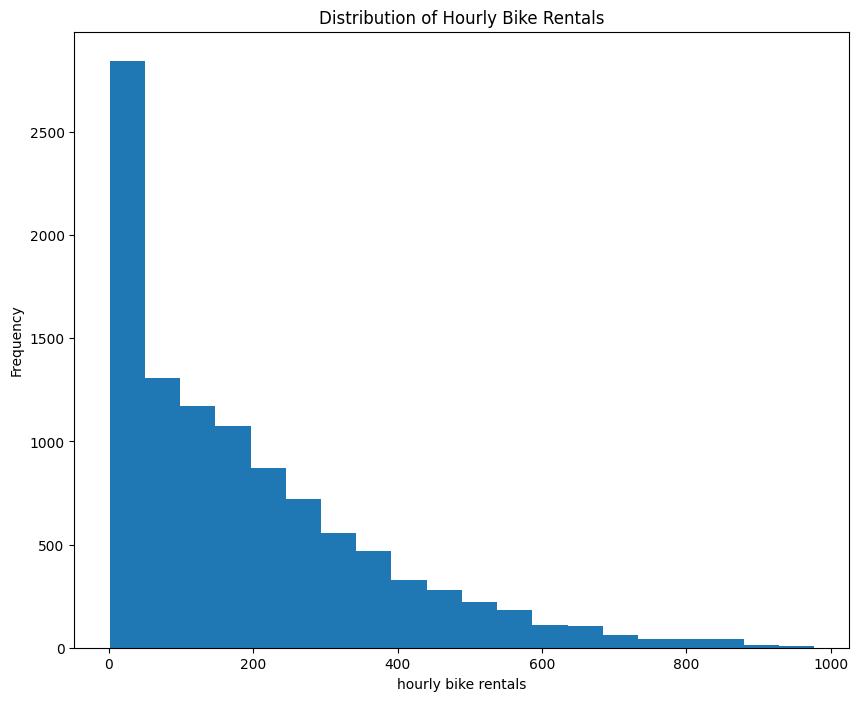

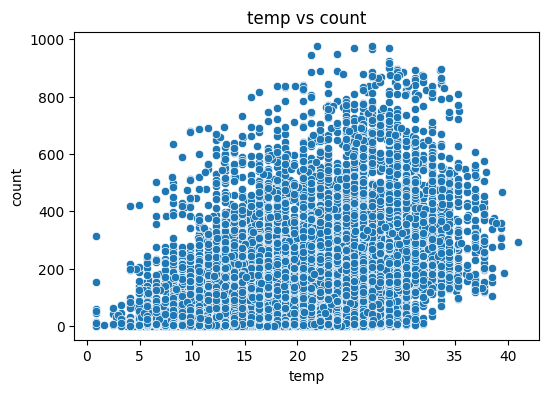

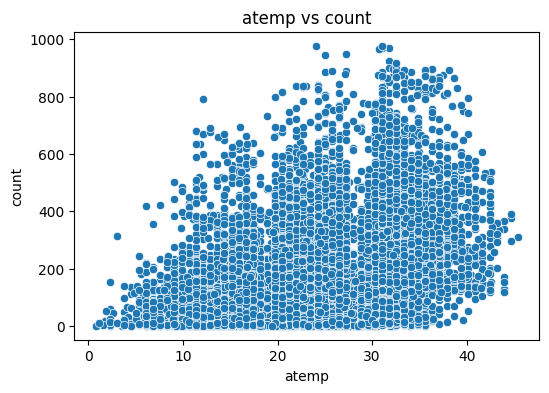

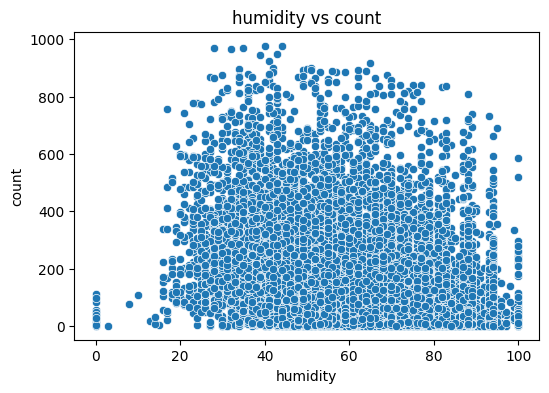

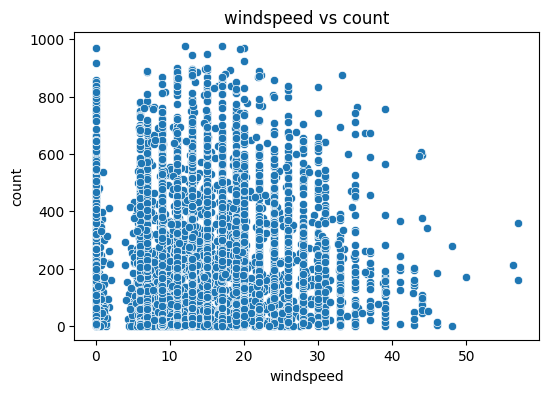

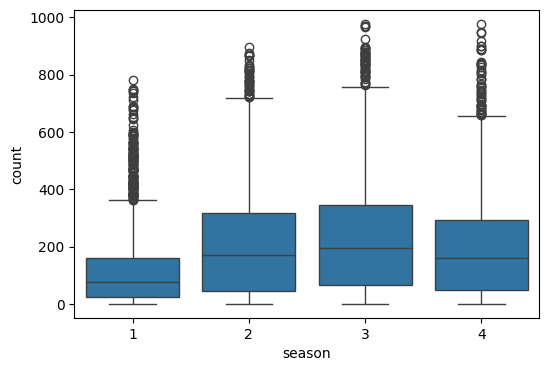

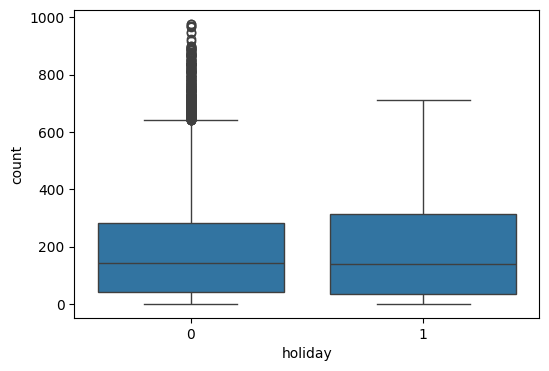

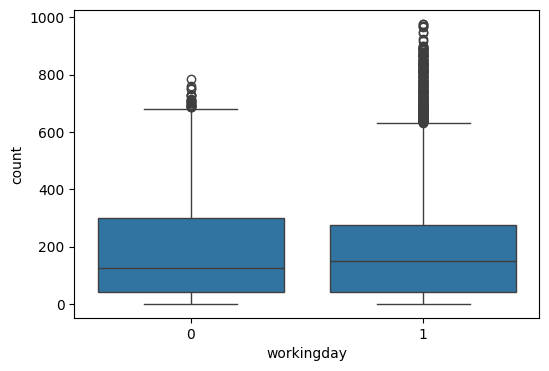

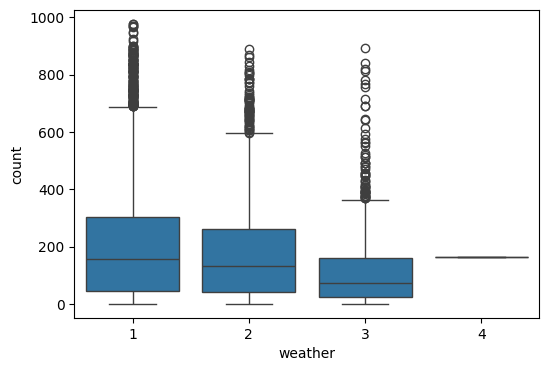

In [10]:

# Q2. Visualize relationships between key features and the target variable (count).
'''
    Here the target variable is count 
    There are both numerical features and categorical  features in this data set
    We will visualize the target variable distribution as a histogram
    We will use scatter plot to visualize the numerical features
    We will use box plot to visualize the categorical features
'''

a.answer_2()


In [11]:
# Q3:Suggest which variables are likely to be most informative.

'''
let us not consider date as it is not related to weather,time and seasonal data
'''

date_untransformed_df = a.answer_3()

'''
Main drivers of bike demand:
    1.Temperature, air temperature
    2.Humidity
    3.Windspeed
Least important:
    1.Weather
    2.Holiday 
'''

atemp         0.148217
temp          0.144299
humidity      0.103698
windspeed     0.026662
season_4      0.019586
season_2      0.018980
weather_3     0.016122
weather_2     0.010356
holiday       0.003410
workingday    0.002813
season_3      0.000971
weather_4     0.000000
dtype: float64


'\nMain drivers of bike demand:\n    1.Temperature, air temperature\n    2.Humidity\n    3.Windspeed\nLeast important:\n    1.Weather\n    2.Holiday \n'

In [12]:
# Q4. You can try to derive features from datetime (hour, weekday, month, season), encode 
# categorical variables, consider transformations to capture nonlinear trends to improve 
# your model performance. If you do any of these, report it as answer to Q4. It is optional.

date_transformed_df = a.answer_4()

'''ANSWER:
Main drivers of bike demand:
    1.Temperature, air temperature
    2.Humidity
    3.Hour of the day
    4.Windspeed
Least important:
    1.Rare weather categories
    2.Holidays
    3.Some weekdays
    4.Months 4, 5, 7 (low effect)
'''


===== MUTUAL INFORMATION SCORES =====
temp          0.150648
atemp         0.147200
humidity      0.105124
hour_4        0.082546
hour_3        0.062296
hour_2        0.060476
hour_5        0.055133
year_2012     0.048695
hour_17       0.044025
hour_18       0.043124
hour_1        0.033099
hour_6        0.032371
hour_19       0.031628
windspeed     0.028271
hour_8        0.024620
hour_9        0.024545
season_3      0.022757
hour_13       0.021973
hour_22       0.021454
month_2       0.020826
hour_23       0.020693
hour_20       0.020233
hour_16       0.018904
hour_10       0.017986
hour_12       0.017123
hour_15       0.016934
weather_3     0.016858
month_10      0.016333
hour_21       0.016272
hour_11       0.015575
hour_14       0.015198
weekday_2     0.014883
month_7       0.014704
weekday_6     0.014456
season_4      0.013009
weekday_5     0.012625
month_3       0.010304
workingday    0.009241
month_9       0.007402
month_4       0.006086
season_2      0.004703
weekday_3     0.004

'ANSWER:\nMain drivers of bike demand:\n    1.Temperature, air temperature\n    2.Humidity\n    3.Hour of the day\n    4.Windspeed\nLeast important:\n    1.Rare weather categories\n    2.Holidays\n    3.Some weekdays\n    4.Months 4, 5, 7 (low effect)\n'

In [13]:
# Q5. Split data into training and validation sets and build a simple Linear Regression model.

a.answer_5_a(date_untransformed_df,date_transformed_df)

'''
Linear Regression Performance with date transformations and feature enginnering
--------------------------------------------------------------------------------
RMSE: 100.73789634050519
RMSLE: 0.845548863327266
R² Score: 0.69064830243152

Linear Regression Performance w/o date transformations and feature enginnering
--------------------------------------------------------------------------------
RMSE: 155.74348578232826
RMSLE: 1.3292031834741815
R² Score: 0.26058793965924953

As Tabulated above the model performance is high when we extract the hours,weekdays,month from datetime feature
and make transformations on the columns along with feature engineering and train the model upon the transformed data
as compared to training the model on untransformed data. 
'''


Linear Regression Performance w/o date transformations and feature enginnering
--------------------------------------------------------------------------------
RMSE: 155.74348578232826
RMSLE: 1.3292031834741815
R² Score: 0.26058793965924953
Linear Regression Performance with date transformations and feature enginnering
--------------------------------------------------------------------------------
RMSE: 100.73789634050519
RMSLE: 0.845548863327266
R² Score: 0.69064830243152


C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))
C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


'\nLinear Regression Performance with date transformations and feature enginnering\n--------------------------------------------------------------------------------\nRMSE: 100.73789634050519\nRMSLE: 0.845548863327266\nR² Score: 0.69064830243152\n\nLinear Regression Performance w/o date transformations and feature enginnering\n--------------------------------------------------------------------------------\nRMSE: 155.74348578232826\nRMSLE: 1.3292031834741815\nR² Score: 0.26058793965924953\n\nAs Tabulated above the model performance is high when we extract the hours,weekdays,month from datetime feature\nand make transformations on the columns along with feature engineering and train the model upon the transformed data\nas compared to training the model on untransformed data. \n'

In [14]:
# Q6. To improve model performance, you may try to: 
#  Extend feature space using polynomial transformations (degree 2 or 3)

'''
Now we will apply the polynomial regression on date transformed data as we have seen model is performing better with 
transformations, Let's make a polynomial regression of degree n = 2
'''

a.answer_6_2(date_transformed_df)
a.answer_6_3(date_untransformed_df)
'''
Polynomial Regression of degree 2 Performance with date transformations
--------------------------------------------------------------------------------
RMSE: 53.569074045095746
RMSLE: 0.6224410274592836
R² Score: 0.9125227689426656

results when n = 2 this shows that model has improved
its performance when we fit the features to a polynomial of degree 2
-->There is an improvement in R^2 score and decrease of error compared to
linear regression values

Polynomial Regression of degree 3 Performance with date transformations
--------------------------------------------------------------------------------
RMSE: 150.53061857767653
RMSLE: 1.3285262353918565
R² Score: 0.30925708151939746

results when n = 3 this shows that model is overfitting as R^2 value is decreasing
it implies the model is failing to predict for validation dataset
--> We can conclude that the ploynominal fit of degree n = 2 are
    apt for the features of this dataset

'''


C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


Polynomial Regression of degree 2 Performance with date transformations
--------------------------------------------------------------------------------
RMSE: 53.569074045095746
RMSLE: 0.6224410274592836
R² Score: 0.9125227689426656
Polynomial Regression of degree 3 Performance with date transformations
--------------------------------------------------------------------------------
RMSE: 150.53061857767653
RMSLE: 1.3285262353918565
R² Score: 0.30925708151939746


C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


'\nPolynomial Regression of degree 2 Performance with date transformations\n--------------------------------------------------------------------------------\nRMSE: 53.569074045095746\nRMSLE: 0.6224410274592836\nR² Score: 0.9125227689426656\n\nresults when n = 2 this shows that model has improved\nits performance when we fit the features to a polynomial of degree 2\n-->There is an improvement in R^2 score and decrease of error compared to\nlinear regression values\n\nPolynomial Regression of degree 3 Performance with date transformations\n--------------------------------------------------------------------------------\nRMSE: 150.53061857767653\nRMSLE: 1.3285262353918565\nR² Score: 0.30925708151939746\n\nresults when n = 3 this shows that model is overfitting as R^2 value is decreasing\nit implies the model is failing to predict for validation dataset\n--> We can conclude that the ploynominal fit of degree n = 2 are\n    apt for the features of this dataset\n\n'

In [15]:
# Q6_b: Apply Ridge and Lasso regression on polynomial features, 
# Tune the regularization 
# strength (α).

'''
We apply the ridge and lasso regression on polynomial features of degree 2 
as degree 3 has decresed the performance and over fitting

'''

a.answer_6_2_ridge(date_transformed_df)
a.answer_6_2_lasso(date_transformed_df)

'''

It was observed that the ridge regression results for a polynomial fit of n =2
after few iterations and when alpha is taken as 10
alpha = 10
RMSE: 53.5247
RMSLE: 0.5853854239381193
R²: 0.9127
there is a slight improvement of R² and a considerable reduction of RMSLE
and most of the evaluation metics are converging after that

'''

'''

It was observed that the ridge regression results for a polynomial fit of n = 2
after few iterations and when alpha is taken as 10
alpha = 10
RMSE: 92.5239
RMSLE: 0.9957264697860753
R²: 0.7390
the values of R² is decreasing steadily and the RMSE,RMSLE are improving which 
tells that the ridge regression is not the best fit for the features of this dataset
and we need to fix the ridge regression and a polynomial fit of degree n = 2

'''

C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


Polynomial Regression of degree 2 Performance with date transformations
--------------------------------------------------------------------------------
RMSE: 53.569074045095746
RMSLE: 0.6224410274592836
R² Score: 0.9125227689426656
Ridge Regression Results
-------------------------


C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.01
  RMSE: 53.5664
RMSLE: 0.6257791282999509
  R²: 0.9125



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.1
  RMSE: 53.5514
RMSLE: 0.6301960771498694
  R²: 0.9126



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.2
  RMSE: 53.5427
RMSLE: 0.6055001402795761
  R²: 0.9126



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.3
  RMSE: 53.5370
RMSLE: 0.6101481331371315
  R²: 0.9126



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.5
  RMSE: 53.5293
RMSLE: 0.5970193074333314
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.6
  RMSE: 53.5263
RMSLE: 0.5956919552765663
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.7
  RMSE: 53.5237
RMSLE: 0.5945387045546767
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.8
  RMSE: 53.5213
RMSLE: 0.623398477454741
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.9
  RMSE: 53.5191
RMSLE: 0.6217949674796796
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 1
  RMSE: 53.5172
RMSLE: 0.614381185555147
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 1.5
  RMSE: 53.5092
RMSLE: 0.6072157553770322
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 2
  RMSE: 53.5037
RMSLE: 0.6163489964656974
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 10
  RMSE: 53.5247
RMSLE: 0.5853854239381193
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


Polynomial Regression of degree 2 Performance with date transformations
--------------------------------------------------------------------------------
RMSE: 53.569074045095746
RMSLE: 0.6224410274592836
R² Score: 0.9125227689426656
Lasso Regression Results
-------------------------


F:\bits ai-ml\ml-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+06, tolerance: 2.739e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.01
  RMSE: 53.4484
RMSLE: 0.5966481089081334
  R²: 0.9129



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.1
  RMSE: 54.1852
RMSLE: 0.6041316327824056
  R²: 0.9105



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.2
  RMSE: 54.9638
RMSLE: 0.5598096876122922
  R²: 0.9079



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.3
  RMSE: 55.5483
RMSLE: 0.5948224618979414
  R²: 0.9059



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.5
  RMSE: 56.5146
RMSLE: 0.5776745536925576
  R²: 0.9026



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.6
  RMSE: 57.0886
RMSLE: 0.6064832040677672
  R²: 0.9007



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.7
  RMSE: 57.6504
RMSLE: 0.5775403264679272
  R²: 0.8987



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.8
  RMSE: 58.1777
RMSLE: 0.5891657745668163
  R²: 0.8968



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.9
  RMSE: 58.7237
RMSLE: 0.6148916773041112
  R²: 0.8949



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 1
  RMSE: 59.2821
RMSLE: 0.6407728425322806
  R²: 0.8929



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 1.5
  RMSE: 62.1559
RMSLE: 0.6694434918783483
  R²: 0.8822



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 2
  RMSE: 64.9323
RMSLE: 0.6916300329407916
  R²: 0.8715

alpha = 10
  RMSE: 92.5239
RMSLE: 0.9957264697860753
  R²: 0.7390



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


'\n\nIt was observed that the ridge regression results for a polynomial fit of n = 2\nafter few iterations and when alpha is taken as 10\nalpha = 10\nRMSE: 92.5239\nRMSLE: 0.9957264697860753\nR²: 0.7390\nthe values of R² is decreasing steadily and the RMSE,RMSLE are improving which \ntells that the ridge regression is not the best fit for the features of this dataset\nand we need to fix the ridge regression and a polynomial fit of degree n = 2\n\n'

In [17]:
#Q7. Summarize all results (of different models tried out) in one table (RMSLE, key observations).

a.answer_7()

                                          Model type  \
0         Linear Regression w/o date transformations   
1        Linear Regression with date transformations   
2               Polynomial Regression of degree n =2   
3               Polynomial Regression of degree n =3   
4  Ridge regression on polynomial of degree 2 and...   
5  Lasso regression on polynomial of degree 2 and...   

   Root Mean square error (RMSE)     RMSLE  R^2 score  \
0                     155.743486  1.329203   0.260588   
1                     100.737896  0.845549   0.690648   
2                      53.569074  0.622441   0.912523   
3                     150.530619  1.328526   0.309257   
4                      53.524700  0.585385   0.912700   
5                      92.523900  0.995726   0.739000   

                                             Summary  \
0  The Error values are very high and the R^2 val...   
1  The error values decreased 36% and the R^2 val...   
2  The error values decreased by 26% an

C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


Polynomial Regression of degree 2 Performance with date transformations
--------------------------------------------------------------------------------
RMSE: 53.569074045095746
RMSLE: 0.6224410274592836
R² Score: 0.9125227689426656
Ridge Regression Results
-------------------------


C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.01
  RMSE: 53.5664
RMSLE: 0.6257791282999509
  R²: 0.9125



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.1
  RMSE: 53.5514
RMSLE: 0.6301960771498694
  R²: 0.9126



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.2
  RMSE: 53.5427
RMSLE: 0.6055001402795761
  R²: 0.9126



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.3
  RMSE: 53.5370
RMSLE: 0.6101481331371315
  R²: 0.9126



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.5
  RMSE: 53.5293
RMSLE: 0.5970193074333314
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.6
  RMSE: 53.5263
RMSLE: 0.5956919552765663
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.7
  RMSE: 53.5237
RMSLE: 0.5945387045546767
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.8
  RMSE: 53.5213
RMSLE: 0.623398477454741
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 0.9
  RMSE: 53.5191
RMSLE: 0.6217949674796796
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 1
  RMSE: 53.5172
RMSLE: 0.614381185555147
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 1.5
  RMSE: 53.5092
RMSLE: 0.6072157553770322
  R²: 0.9127



C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


alpha = 2
  RMSE: 53.5037
RMSLE: 0.6163489964656974
  R²: 0.9127

alpha = 10
  RMSE: 53.5247
RMSLE: 0.5853854239381193
  R²: 0.9127

318      41.658096
7234     38.608473
4816      0.798805
4419    -33.726900
9698     34.341042
           ...    
3445     85.621152
611      26.305397
8934    -78.005239
4514    158.946404
511      -3.661185
Name: count, Length: 2090, dtype: float64


C:\Users\caswi\AppData\Local\Temp\ipykernel_23164\2339297734.py:11: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


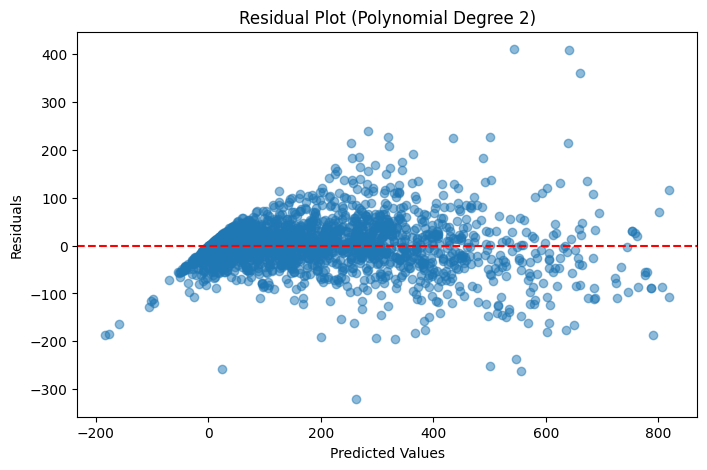

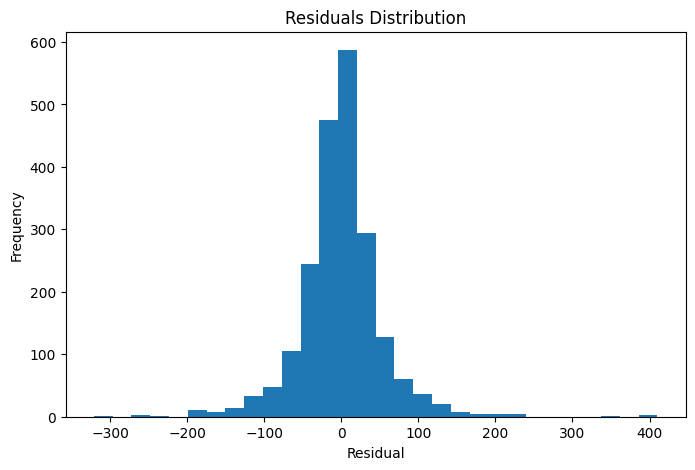

In [18]:
# Q8. Plot residuals for the best model

residuals,y_pred = a.answer_6_2_ridge(date_transformed_df)
a.answer_8(residuals,y_pred)


In [19]:
# Q9. Explain why the winning model performs better

'''
1.The relationship between features and target is non-linear. it is converging at
degree 2 and over fitting for degree 3. so polynomial fit of degree 2 for ridge regression is best fit
2. Lower residuals → Better fit, it has lower residuals compared to linear and polynomial of degree 3
3.Higher R² Score
4.Lower RMSE / RMSLE
'''

'\n1.The relationship between features and target is non-linear. it is converging at\ndegree 2 and over fitting for degree 3. so polynomial fit of degree 2 for ridge regression is best fit\n2. Lower residuals → Better fit, it has lower residuals compared to linear and polynomial of degree 3\n3.Higher R² Score\n4.Lower RMSE / RMSLE\n'

In [ ]:
# Q10. Why does RMSLE penalize under-predictions more gently than RMSE?

'''
ans:
Because of the logarithm, differences between predicted 
and actual values shrink on the log scale, especially for small true values.
eg:
--
Actual = 100
Predict = 50

Error = 50 (big) on normal scale
ln(101)−ln(51)=4.615−3.932=0.683 error becomes very small when we take ln()

RMSLE penalizes under-predictions more gently than RMSE because the logarithmic transformation 
compresses large absolute differences. RMSLE measures relative (percentage-based) error instead of 
absolute error, so under-predicting large values results in a much smaller penalty on the log scale. 
RMSE, working in the original scale, heavily penalizes large absolute differences.

'''


In [ ]:
# Q11. What are the trade-offs between model simplicity and predictive power?

'''
Ans:
------
Simple models -> easy to interpret, fast, generalize well, but may miss complex patterns.

Complex models -> capture more structure and achieve higher accuracy, but can overfit, 
require more data, and are harder to explain.

The goal is to pick a model that is as simple as possible while still achieving good predictive performance
'''


In [ ]:
# Q12. Why can’t Linear Regression alone capture time-of-day effects effectively?

'''
Ans:
----
Because some of the features inside the give dataset are non linear and fit well with polynomail fit
due to this evaluation metrics of linear model is poor when compareed to a polynomial fit of degree 2
'''